## Lesson 8 - Numpy, Pandas and Matplotlib Crashcourse

Here will introduce Numpy, Pandas and Matplotlib. Numpy is the core numerical computing package in Python, and its core type is ndarray. Pandas uses DataFrames (tables, much like R DataFrames) and Series (columns of a DataFrame) with powerful SQL-like queries. Matplotlib is a package for plotting, which uses a MATLAB-style syntax.

### Numpy

There are three types of array in Python's basic variables: `list`, `tuple`, and `dict`. 
`list` can be used to store array data. 

The standard python library provides [`array`](http://docs.python.org/library/array.html) class that will provide more functions than `list`. 

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy`, you need to import the module:

In [1]:
import numpy as np

#### Creating Numpy arrays

There are a number of ways to initialize new Numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

##### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`:

In [8]:
np.shape(M)

(2, 2)

In [9]:
np.size(M)

4

So far the `numpy.ndarray` looks a lot like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [10]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [11]:
#M[0,0] = 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [12]:
N = np.array([[1, 2], [3, 4]], dtype=complex)
N

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

#### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit pythons lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

In [13]:
# create a range
x = np.arange(-0.5, 0.5, 0.1) # arguments: start, stop, step
x

array([ -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
        -2.00000000e-01,  -1.00000000e-01,  -1.11022302e-16,
         1.00000000e-01,   2.00000000e-01,   3.00000000e-01,
         4.00000000e-01])

In [14]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [15]:
# similar to meshgrid in MATLAB
x, y = np.mgrid[0:5, 0:5] 

In [16]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [17]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [18]:
# uniform random numbers in interval [0,1]
np.random.rand(5,5)

array([[ 0.20690969,  0.38802572,  0.19273463,  0.92727212,  0.63552396],
       [ 0.8892698 ,  0.41237818,  0.17364446,  0.54929249,  0.92698433],
       [ 0.35737298,  0.74942801,  0.30708419,  0.13931639,  0.54169744],
       [ 0.08709615,  0.81374688,  0.40092165,  0.13008326,  0.12670552],
       [ 0.38699911,  0.4268476 ,  0.32614382,  0.14723118,  0.66193525]])

In [19]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[ 0.16166455, -1.8022809 ,  1.76541288, -0.06363479,  0.34202902],
       [-0.02870071, -0.53721985, -1.00839885,  1.03841846,  0.15374015],
       [-2.73876939,  0.03321655, -1.52469435, -1.5478414 , -2.30355135],
       [-1.44440987, -0.57299363,  0.62362248, -1.23918768,  0.91682266],
       [ 0.31207165, -0.8551816 ,  0.17672669, -0.72002665,  0.83282406]])

In [20]:
# diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [21]:
# zeros
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [22]:
# ones
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [23]:
# ones as int
np.ones((3,3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

#### Indexing

We can index elements in an array using the square bracket and indices:

In [24]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [25]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

In [26]:
# If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [27]:
M[1,:] # row 1

array([3, 4])

In [28]:
M[:,1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [29]:
M[0,0] = -1
M

array([[-1,  2],
       [ 3,  4]])

In [30]:
# also works for rows and columns
M[0,:] = 0
M[:,1] = -2

In [31]:
M

array([[ 0, -2],
       [ 3, -2]])

#### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [32]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [33]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [34]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [35]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [36]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [37]:
A[:3] # first three elements

array([ 1, -2, -3])

In [38]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [39]:
A = np.array([1,2,3,4,5])

In [40]:
A[-1] # the last element in the array

5

In [41]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [42]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [43]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [44]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

#### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [45]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [46]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also index masks: If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [47]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [48]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [49]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [50]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [51]:
# want values of x that are at least 5 and have no decimal component
mask = (x >= 5) & (x % 1 == 0)
mask

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False], dtype=bool)

In [52]:
x[mask]

array([ 5.,  6.,  7.,  8.,  9.])

#### Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

In [53]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [54]:
v1 * 2

array([0, 2, 4, 6, 8])

In [55]:
v1 + 2

array([2, 3, 4, 5, 6])

In [56]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [57]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [58]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [59]:
np.dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra. There is a ton of matrix math that we won't cover here.

In [60]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vectorm

In [61]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [62]:
M*M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [63]:
M*v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

#### Data computations

In [64]:
np.mean(v1)

2.0

In [65]:
np.std(v1), np.var(v1)

(1.4142135623730951, 2.0)

In [66]:
v1.min()

0

In [67]:
v1.max()

4

In [68]:
sum(v1)

10

#### Iterating over array elements

In [69]:
for element in v1:
    print(element)

0
1
2
3
4


In [70]:
M

matrix([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34],
        [40, 41, 42, 43, 44]])

In [71]:
M = np.array([[1,2], [3,4]])
M

array([[1, 2],
       [3, 4]])

In [72]:
for row in M:
    print("row", row)    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


In [73]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element) 
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [74]:
# each element in M are now squared
M

array([[ 1,  4],
       [ 9, 16]])

### Pandas

#### What is Pandas? From Wikipedia...

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

#### Library features

* DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different file formats
* Data alignment and integrated handling of missing data
* Reshaping and pivoting of data sets
* Label-based slicing, fancy indexing, and subsetting of large data sets
* Data structure column insertion and deletion
* Group by engine allowing split-apply-combine operations on data sets
* Data set merging and joining
* Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging

The library is highly optimized for performance, with critical code paths written in Cython or C.

#### Download data

I copied data from http://www.sccoos.org/data/autoshorestations/autoshorestations.php?study=Scripps%20Pier and pasted it into Excel, then saved it as a CSV file named scripps_pier_20151110.csv.

#### Import modules

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read data from CSV

In [76]:
data1 = pd.read_csv('scripps_pier_20151110.csv', index_col=None, header=0)

In [77]:
data1.head()

,Date,chl (ug/L),pres (dbar),sal (PSU),temp (C)
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [78]:
data2 = pd.read_csv('scripps_pier_20151110.csv', index_col=0, header=0)

In [79]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [80]:
data2.describe()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
count,66.000000,66.000000,66.000000,66.00000
mean,22.349576,3.041818,33.199318,20.06697
std,0.038988,0.254295,0.004959,0.06850
min,22.305000,2.714000,33.184000,19.94000
25%,22.319000,2.813250,33.197000,20.04000
50%,22.333500,2.997000,33.199000,20.07000
75%,22.385000,3.215500,33.203000,20.10500
max,22.426000,3.712000,33.206000,20.19000


#### Indexing in pandas

There are three ways to index a Pandas DataFrame.

* loc works on labels in the index.
* iloc works on the positions in the index (so it only takes integers).
* ix usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

#### With Date as the index column (data2)

In [81]:
data2.ix[0]

chl (ug/L)     22.307
pres (dbar)     3.712
sal (PSU)      33.199
temp (C)       19.950
Name: 11/10/15 1:42, dtype: float64

In [82]:
data2['temp (C)'].head(10)

Date
11/10/15 1:42    19.95
11/10/15 1:35    19.94
11/10/15 1:29    19.95
11/10/15 1:23    19.95
11/10/15 1:17    19.95
11/10/15 1:11    19.95
11/10/15 1:05    19.96
11/10/15 0:59    19.99
11/10/15 0:53    20.00
11/10/15 0:47    20.01
Name: temp (C), dtype: float64

#### With no index column (data1)

In [83]:
data1.ix[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [84]:
data1.loc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [85]:
data1.iloc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [86]:
data1['Date'].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

In [87]:
data1.iloc[:,0].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

#### Convert date/time to timestamp object

In [88]:
time = pd.to_datetime(data1.iloc[:,0])
time.head()
type(time)

pandas.core.series.Series

In [89]:
time

0    2015-11-10 01:42:00
1    2015-11-10 01:35:00
2    2015-11-10 01:29:00
3    2015-11-10 01:23:00
4    2015-11-10 01:17:00
5    2015-11-10 01:11:00
6    2015-11-10 01:05:00
7    2015-11-10 00:59:00
8    2015-11-10 00:53:00
9    2015-11-10 00:47:00
10   2015-11-10 00:41:00
11   2015-11-10 00:35:00
12   2015-11-10 00:29:00
13   2015-11-10 00:23:00
14   2015-11-10 00:17:00
15   2015-11-10 00:11:00
16   2015-11-10 00:05:00
17   2015-11-09 23:59:00
18   2015-11-09 23:53:00
19   2015-11-09 23:47:00
20   2015-11-09 23:41:00
21   2015-11-09 23:35:00
22   2015-11-09 23:29:00
23   2015-11-09 23:23:00
24   2015-11-09 23:17:00
25   2015-11-09 23:11:00
26   2015-11-09 23:05:00
27   2015-11-09 22:59:00
28   2015-11-09 22:53:00
29   2015-11-09 22:47:00
             ...        
36   2015-11-09 22:05:00
37   2015-11-09 21:59:00
38   2015-11-09 21:53:00
39   2015-11-09 21:47:00
40   2015-11-09 21:41:00
41   2015-11-09 21:35:00
42   2015-11-09 21:29:00
43   2015-11-09 21:23:00
44   2015-11-09 21:17:00


### Matplotlib

#### Plot a single variable vs. time

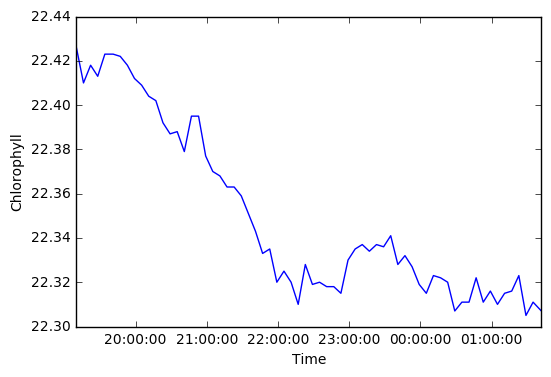

In [90]:
fig = plt.figure()
plt.plot(time, data1['chl (ug/L)'])
plt.xlabel('Time')
plt.ylabel('Chlorophyll')
fig.savefig('scripps_pier_Chlorophyll.pdf')

#### Plot each response variable in a loop

In [91]:
data1.rename(columns={'chl (ug/L)': 'Chlorophyll', 'pres (dbar)': 'Pressure', 'sal (PSU)': 'Salinity', 'temp (C)': 'Temperature'}, inplace=True)

In [92]:
data1.head()

,Date,Chlorophyll,Pressure,Salinity,Temperature
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [93]:
data1.columns

Index(['Date', 'Chlorophyll', 'Pressure', 'Salinity', 'Temperature'], dtype='object')

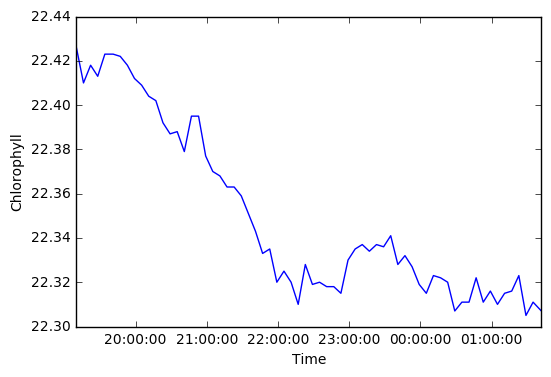

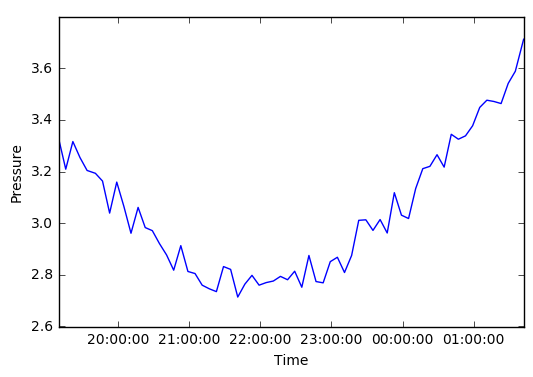

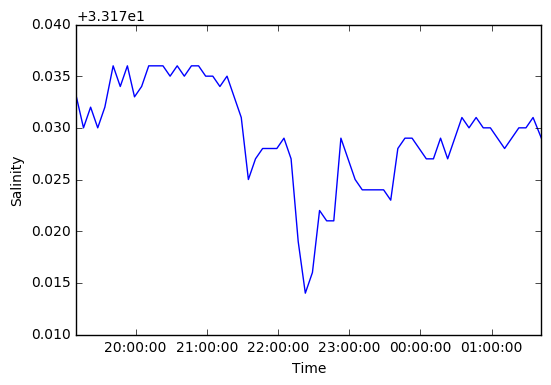

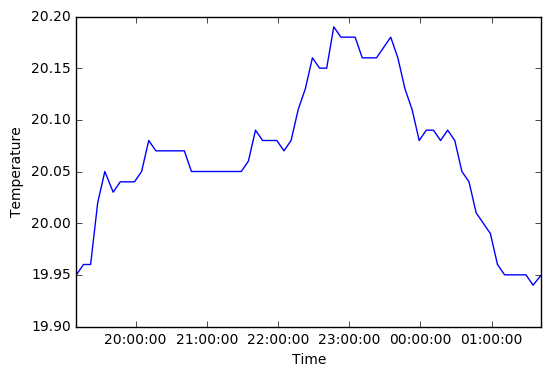

In [94]:
for col in data1.columns:
    if col != 'Date':
        fig = plt.figure()
        plt.plot(time, data1[col])
        plt.xlabel('Time')
        plt.ylabel(col)
        fig.savefig('scripps_pier_%s.pdf' % col)

#### Plot all response variables together

In [95]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [96]:
data2.index = pd.to_datetime(data2.index)

In [97]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
2015-11-10 01:42:00,22.307,3.712,33.199,19.95
2015-11-10 01:35:00,22.311,3.588,33.201,19.94
2015-11-10 01:29:00,22.305,3.541,33.200,19.95
2015-11-10 01:23:00,22.323,3.463,33.200,19.95
2015-11-10 01:17:00,22.316,3.471,33.199,19.95


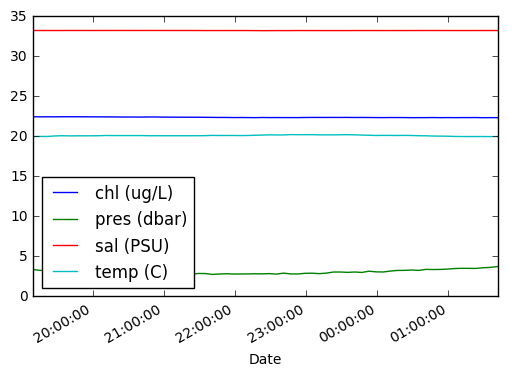

In [98]:
plt.figure()
data2.plot()
plt.legend(loc='best')

### P.S. About that name...

The name "Pandas" actually has nothing to do with the animal. It is derived from the term "panel data", an econometrics term for multidimensional structured data sets.

![pandas](http://wdy.h-cdn.co/assets/16/05/980x490/landscape-1454612525-baby-pandas.jpg)

### Assignment for Lessons 7-8

1. Regular expressions in the command line: Use regular expressions to get information from the file scripps_pier_20151110.csv. Copy your shell code (e.g., grep, sed) to a cell in your notebook.
    * Get all the rows with data from 11/10/15 using grep. How would you keep the header line also? (Hint: the characters "\|" together mean "or" in grep.) 
    * Get all the rows where the third column (pressure) begins with a "3" using grep. (Hint: if you want to match a period "." and not any character, you can escape it with "\.".)
    * Change the year "15" to "2015" using sed. (Reminder: sed syntax is `'sed s/find/replace/'`. Hint: if you want to match a forward slash in sed, you can escape it with a backslash like "\/".)
2. Regular expressions in Python: Import the re module. Then create the string 'The quick brown fox jumps over the lazy dog'.
    * Use re.match to see if the string starts with 'The'.
    * Use re.search to find the first instance of a lowercase letter followed by an 'o'.
    * Use re.findall to find all instances of a lowercase letter followed by an 'o'.
    * Use re.sub to change the last word to an animal of your choice.
3. Numpy: Create an array of ten random floats ranging from 0 to 10. Create a second array of ten integers from 0 to 9. Use 'fancy indexing' with masks to find the values in your first array that are greater than their corresponding values in the second array (e.g., if the first element in array 1 is greater than the first element in array 2).
4. Pandas: Read in the csv file scripps_pier_20151110.csv as a Pandas DataFrame with the index as the Date column and the column headers from the first row of that file.
    * Print all the date/times from 11/10/15. (Hint: you can get the indexes from the DataFrame, convert it to a list, then iterate over that list (using a for loop or list comprehension), and then use re.match or re.search.)
    * Print all the rows from 11/10/15. (Hint: you can use your answer to the exercise you just did but use .loc indexing.)